<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)"> Predictive Analysis - Image Processing</h2>

[source](https://medium.com/swlh/classifying-fashion-mnist-dataset-with-convolutional-neural-nets-dd092d755164)

!pip3 install -U opencv-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from sklearn.metrics import accuracy_score
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('Shape:')
print('X_Train {}'.format(x_train.shape))
print('Y_Train {}'.format(y_train.shape))
print('X_Test {}'.format(x_test.shape))
print('Y_Test {}'.format(y_test.shape))

Shape:
X_Train (60000, 28, 28)
Y_Train (60000,)
X_Test (10000, 28, 28)
Y_Test (10000,)


In [3]:
def check_samples(sample, plot=True):
    counter = {}
    for key in sample:
        if key not in counter.keys():
            counter[key] = 1
        else:
            counter[key] = counter[key] + 1
    df_dict = {'cat':[x for x in counter.keys()], 
               'cnt':[y for y in  counter.values()]}
    cnt_df = pd.DataFrame(df_dict)
    if plot:
        sns.barplot(data=cnt_df, x='cat', y='cnt')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.title('# of Obs. in each Category')
        return None
    else:
        return cnt_df

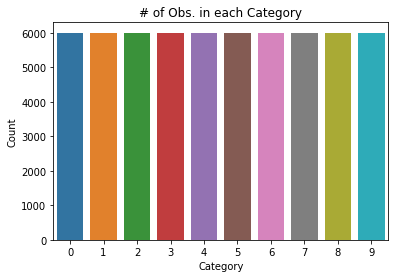

In [4]:
check_samples(y_train)

In [5]:
#Scale Image
def scale_img(dim, img):
    resized_img = cv2.resize(np.asarray(img), dim, interpolation = cv2.INTER_AREA)
    return resized_img

#Normalize Image
def normalize_img(img, is_gray = False):
    normalized_img = cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
    if is_gray:
        cvt = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2GRAY)
        return cvt
    return normalized_img

#Rotate Image
def rotate_img(img, rot_deg):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot_deg,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

#Translate Image
def translate_img(img,x=100,y=50):
    rows,cols = img.shape[0], img.shape[1]
    M = np.float32([[1,0,x],[0,1,y]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

In [ ]:
x_train_tran = x_train.tolist()
y_train_tran = y_train.tolist()
ctr = 0
for img in x_train:
    x_train_tran.append(rotate_img(img, 90))
    y_train_tran.append(y_train[ctr])
    x_train_tran. append(translate_img(img, x=15, y=15))
    y_train_tran.append(y_train[ctr])
    ctr = ctr + 1
    
x_train_tran = np.array(x_train_tran).reshape(len(x_train_tran), 28, 28, 1)
y_train_tran = to_categorical(np.array(y_train_tran))
x_train_tran, y_train_tran = shuffle(x_train_tran, y_train_tran)

print('Shape:')
print('X_Train {}'.format(x_train_tran.shape))
print('Y_Train {}'.format(y_train_tran.shape))

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu',input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(3,3), strides=(3,3)))
cnn_model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(to_categorical(y_train).shape[1], activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='loss', min_delta=1e-4, patience=15, verbose=2, mode='auto')

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_tran, y_train_tran, batch_size=32, epochs=150, callbacks=[es])

In [ ]:
preds = cnn_model.predict(x_test_tran)
pred_list = []
for i in preds:
    pred_list.append(np.argmax(i))

print('{}%'.format(accuracy_score(y_pred=pred_list,y_true=y_test) * 100))

In [ ]:
class_map = {0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}

true_class_ct = {}

for i in range(10):
    true_class_ct[class_map[i]] = sum(1 for x in incorrect_df['true'] if x == class_map[i])
    pred_class_ct = {}
for i in range(10):
    pred_class_ct[class_map[i]] = sum(1 for x in incorrect_df['pred'] if x == class_map[i])
    
pred_class_ctop = {}

def percentage_error(trueval, changedval, i):
    op[class_map[i]] = ((changedval - trueval)/trueval) * 100
    
for ct in range(10):
    tv = true_class_ct[class_map[ct]]
    cv = pred_class_ct[class_map[ct]]
    percentage_error(tv, cv, ct)
    
fig, ax = plt.subplots()
width = 0.4
x = np.arange(10)
rects1 = ax.bar(x - width/2, list(true_class_ct.values()), width, label='True')
rects2 = ax.bar(x + width/2, list(pred_class_ct.values()), width, label='CNN Predicted')

ax.set_ylabel('Count')
ax.set_title('Classification Error in each class')
ax.set_xticks(x)
ax.set_xticklabels(list(op.keys()))
ax.legend()
plt.xticks(rotation=45)

In [ ]:
sns.barplot(x=list(op.keys()), y=list(op.values()))
plt.ylabel("Percentage")
plt.title('Percentage error for each class')
plt.xticks(rotation=45)
plt.xlabel('Classes')

Sneakers seems to be a problem. The model classified 60% more samples as sneakers than the original samples that were sneakers. Percentage, however, by itself is not enough. If we consider both bar charts, we can see that our model is overfitting few categories. There are few ways to avoid that.

+ Regularization (L1/L2)
+ Adding Dropout Layers
+ Adding more data by data augmentation (which we did).

Model fitting in my opinion is an iterative process. You begin with a model that you think has best hyperparameters to understand data. You then assess the model to see how well it performs on the training data using metrics like accuracy, loss etc. If the model seems to be not doing great, you tweak the hyperparameters and fit the model again until you reach a desired model. Hypothetically, a desired model is the one that has close to 100% accuracy and, that does not over or under-fit on training set and is not biased.